## Assignment 2
#### Ujjwal Chowdhury

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Setting working Directory
%cd C:/Users/Ujjwa/OneDrive/Desktop/BDA/Semester 2/Machine Learning/Class/Assignments/Assignment 2

C:\Users\Ujjwa\OneDrive\Desktop\BDA\Semester 2\Machine Learning\Class\Assignments\Assignment 2


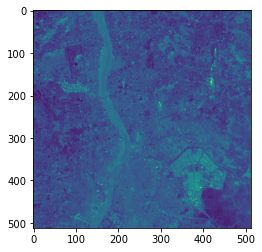

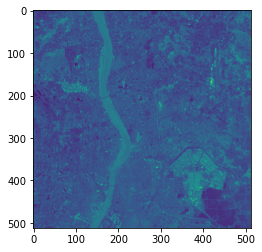

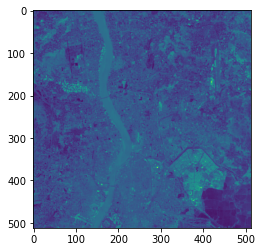

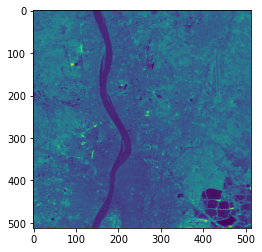

(512, 512)

In [3]:
image1 = np.array(Image.open('band1.gif'))
image2 = np.array(Image.open('band2.gif'))
image3 = np.array(Image.open('band3.gif'))
image4 = np.array(Image.open('band4.gif'))



plt.imshow(image1)
plt.show()
plt.imshow(image2)
plt.show()
plt.imshow(image3)
plt.show()
plt.imshow(image4)
plt.show()
image4.shape

In [10]:
# Collecting river coordinates from band 4 using gimp

river = np.array(([167,216],[202,353],[186,381],[208,358],[209,330],[182,223],[152,20],[154,506],[188,396],[225,331],[149,492],[227,316],
                  [147,5],[153,7],[150,12],[154,19],[152,32],[173,91],[155,18],[158,32],[166,57],[170,66],[169,54],[173,63],[172,85],[175,110],
                   [171,102],[175,121],[172,108],[168,130],[170,142],[167,155],[165,171],[170,184],[161,184],[160,196],[171,191],[165,203],
                   [176,202],[167,213],[178,217],[172,224],[178,228],[174,246],[189,260],[194,262],[195,250],[190,261],[199,277],[206,273],
                   [202,274],[201,270],[203,294],[216,289],[212,300],[215,299],[217,328],[211,331],[168,68],[169,69],[176,88],[177,101],
                   [168,136],[177,154],[162,198],[161,196],[177,230],[194,243],[138,504],[163,485]))


In [28]:
print('Total number of river coordinates = ',river.shape)

Total number of river coordinates =  (70, 2)


In [20]:
# Collecting not river coordinates from band 4 using gimp
not_river = np.array([[431,451],[16,20],[54,10],[28,60],[497,14],[503,80],
                      [224,120],[203,201],[114,299],[44,271],[245,435],[95,232],
                      [203,176],[106,171],[112,250],[21,293],[86,302],[250,354],[7,497],[80,488],
                      [244,367],[197,309],[201,214],[118,140],[28,88],
                      [ 32, 436],[ 52, 252],[348, 476],[485, 307],[231,  93],[123, 116],[343, 490],[234, 468],[435, 400],[372, 452],
       [325, 307],[141, 309],[263,35],[248, 301],[ 72, 450],[237, 148],[283,  41],[492, 450],[132, 295],[ 86, 452],[116, 312],
       [224, 211],[298,  36],[479, 430],[238,  56],[259,  51],[431, 446],[461, 490],[411,  29],[277, 480],[388,  99],[206,  55],[469, 408],
       [392,  91],[129, 126],[371, 175],[108, 401],[426, 483],[111, 142],[424, 410],[415, 189],[426, 302],[101, 268],[124, 112],
       [398, 121],[ 45, 432],[476, 221],[ 78, 260],[268, 348],[335, 412],[372, 159],[124, 406],[304, 220],[ 58, 446],[357, 307],
       [338, 476],[270, 144],[440, 416],[310,  96],[281, 246],[428,  24],[222, 185],[468,  90],[417, 235],[332, 252],[321, 440],
       [469,  52],[443, 116],[410, 388],[410, 104],[441,  62],[ 68, 128],[235, 161],[460, 480],[463, 422],[375, 287],[68, 130],
       [454, 318],[314, 143],[316, 357],[274,  93],[101, 440],[114, 279],[362, 303], [390,  58],[257, 224],[324, 347],
       [292,  74],[474,  35],[455, 452],[468,  56],[455, 458],[473, 463],[230,  60],[413, 306],[360, 334],[ 55, 145],[313, 470],
       [418,  40],[488, 184]])

In [31]:
print('Total number of not river coordinates = ',not_river.shape)

Total number of not river coordinates =  (125, 2)


In [21]:
# Appending pixel values of river in four images 
river_1=[]
river_2=[]
river_3=[]
river_4=[]
for i in range(70):
    river_1.append(image1[river[i][1],river[i][0]])
    river_2.append(image2[river[i][1],river[i][0]])
    river_3.append(image3[river[i][1],river[i][0]])
    river_4.append(image4[river[i][1],river[i][0]])

In [22]:
# Appending pixel values of not river in four images 
not_river_1=[]
not_river_2=[]
not_river_3=[]
not_river_4=[]
for i in range(125):
    not_river_1.append(image1[not_river[i][1],not_river[i][0]])
    not_river_2.append(image2[not_river[i][1],not_river[i][0]])
    not_river_3.append(image3[not_river[i][1],not_river[i][0]])
    not_river_4.append(image4[not_river[i][1],not_river[i][0]])

In [26]:
river_train_set = np.array(np.transpose([river_1,river_2,river_3,river_4]))
not_river_train_set = np.array(np.transpose([not_river_1,not_river_2,not_river_3,not_river_4]))
#river_train_set.shape
#not_river_train_set.shape

In [57]:
#river_train_set.shape
river_train_set.shape

(70, 4)

In [58]:
#not_river_train_set.shape
not_river_train_set.shape

(125, 4)

In [36]:
river_train_set_mean = river_train_set.mean(axis=0) # Row wise mean 
not_river_train_set_mean = not_river_train_set.mean(axis=0) # Row wise mean

In [59]:
test_data =np.array([image1,image2,image3,image4])
test_data.shape

(4, 512, 512)

In [38]:
# Coveriance

def cov(d):
    m = d.mean(0)
    row,col=d.shape
    covm = np.zeros((col,col))
    v = np.zeros(col)        
    for j in range(col):
        for k in range(col):
            for i in range(row):
                covm[j][k] += (1/row) * (d[i][j] - m[j]) * (d[i][k] - m[k])                    
    return covm

In [42]:
# Coveriance martix of river
cov_matrix_river = cov(river_train_set)
cov_matrix_river

array([[ 0.54204082,  0.3522449 ,  0.39918367, -0.09959184],
       [ 0.3522449 ,  0.88489796,  0.8522449 , -1.14040816],
       [ 0.39918367,  0.8522449 ,  1.50632653, -1.17102041],
       [-0.09959184, -1.14040816, -1.17102041, 12.99265306]])

In [60]:
# Covariance matrix of not river class
cov_matrix_not_river = cov(not_river_train_set)
cov_matrix_not_river

array([[ 7.488   ,  6.2512  ,  8.816   ,  4.6752  ],
       [ 6.2512  ,  6.212224,  8.19008 ,  7.347584],
       [ 8.816   ,  8.19008 , 14.4416  ,  8.30528 ],
       [ 4.6752  ,  7.347584,  8.30528 , 47.289344]])

In [50]:
#posterior
def posterior(i,j):
    riv = np.subtract(test_data[:,i,j],river_train_set_mean)
    not_riv = np.subtract(test_data[:,i,j],not_river_train_set_mean)

    river_class= np.dot(np.dot(riv.T,np.linalg.inv(cov_matrix_river)), riv)
    non_river_class = np.dot(np.dot(not_riv.T,np.linalg.inv(cov_matrix_not_river)), not_riv)

    det_r = np.linalg.det(cov_matrix_river)
    p1 = (-1/2) * 1/np.sqrt(det_r) * np.exp(river_class);

    det_nr = np.linalg.det(cov_matrix_not_river)
    p2 = (-1/2) * 1/np.sqrt(det_nr) * np.exp(non_river_class);
    return p1,p2

In [51]:
#Bays
def bayes(P1, P2):
    output_image=np.zeros((512,512))
    for i in range(512):
        for j in range(512):
            p1,p2 = posterior(i,j)
            if((P1 * p1) >= (P2 * p2)):
                output_image[i,j]=255
            else:
                output_image[i,j]=0
                
    return output_image

In [52]:
# For Image 4

In [53]:
sample = plt.imread('band4.gif')

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_1696/429329664.py:10: RuntimeWarning: overflow encountered in exp
  p1 = (-1/2) * 1/np.sqrt(det_r) * np.exp(river_class);


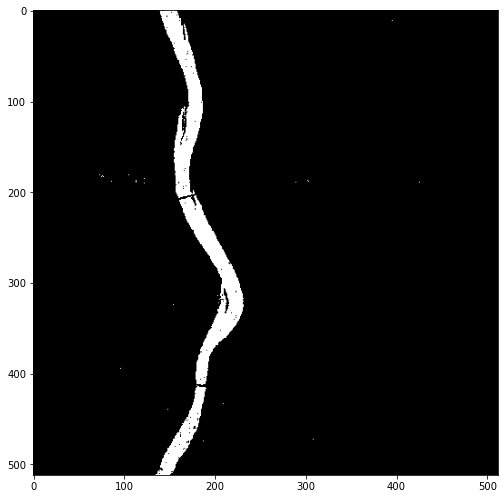

Our accuracy is  :  96.47483825683594 %


In [54]:
img = bayes(P1=0.5,P2=0.5)

plt.imshow(img, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()


count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>125:
            val=255
        else:
            val=0
        if (val==img[i,j]):
            count = count+1
print('Our accuracy is  : ',count*100/(512*512),'%')

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_1696/429329664.py:10: RuntimeWarning: overflow encountered in exp
  p1 = (-1/2) * 1/np.sqrt(det_r) * np.exp(river_class);


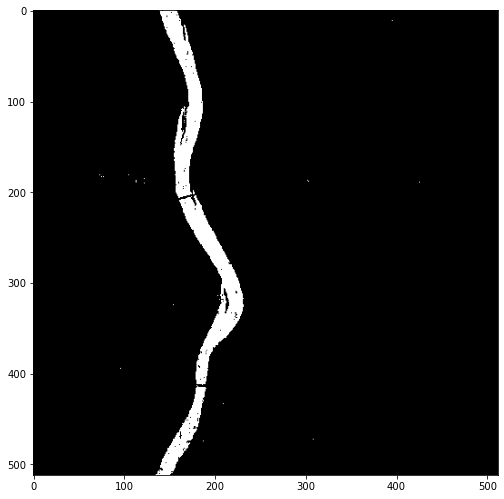

Our accuracy is  :  96.52214050292969 %


In [56]:
#For image 1
sample = plt.imread('band1.gif')

img = bayes(P1=0.7,P2=0.3)

plt.imshow(img, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()


count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>125:
            val=255
        else:
            val=0
        if (val==img[i,j]):
            count = count+1
print('Our accuracy is  : ',count*100/(512*512),'%')

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_11236/429329664.py:10: RuntimeWarning: overflow encountered in exp
  p1 = (-1/2) * 1/np.sqrt(det_r) * np.exp(river_class);


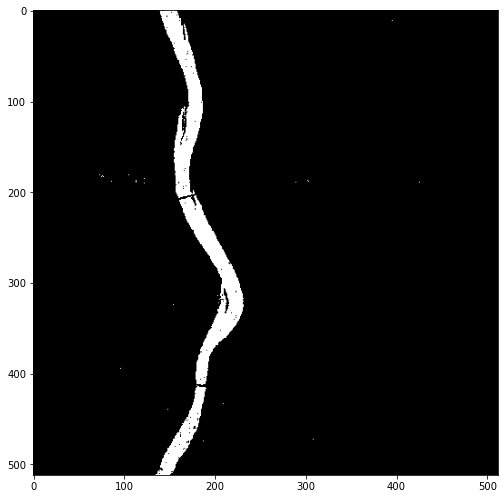

Our accuracy is  :  96.56333923339844 %


In [143]:
#For image 2
sample = plt.imread('band2.gif')

img = bayes(P1=0.9,P2=0.1)

plt.imshow(img, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()


count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>125:
            val=255
        else:
            val=0
        if (val==img[i,j]):
            count = count+1
print('Our accuracy is  : ',count*100/(512*512),'%')

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_11236/429329664.py:10: RuntimeWarning: overflow encountered in exp
  p1 = (-1/2) * 1/np.sqrt(det_r) * np.exp(river_class);


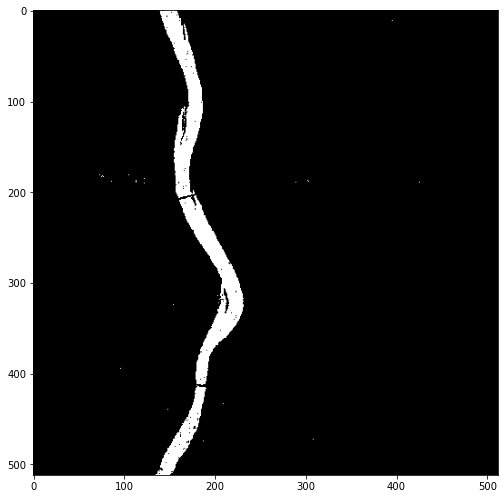

Our accuracy is  :  96.533203125 %


In [144]:
#For image 3
sample = plt.imread('band3.gif')

img = bayes(P1=0.8,P2=0.2)

plt.imshow(img, cmap='gray')
plt.subplots_adjust(right=1.2, top=2)
plt.show()


count=0
for i in range(512):
    for j in range(512):
        if sample[i,j,0]>100:
            val=255
        else:
            val=0
        if (val==img[i,j]):
            count = count+1
print('Our accuracy is  : ',count*100/(512*512),'%')

In [119]:
%%time
#
accuracy = np.zeros(11)
P1=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]

for k,item in enumerate(P1):
    img = bayes(P1=item,P2=(1-item))
    count=0
    for i in range(512):
        for j in range(512):
            if sample[i,j,0]>125:
                val=255
            else:
                val =0
            if val==img[i,j]:
                count = count+1
    accuracy[k] = count*100/(512*512)
    print('Accuracy for',item,":",accuracy[k],'%')

C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_11236/429329664.py:10: RuntimeWarning: overflow encountered in exp
  p1 = (-1/2) * 1/np.sqrt(det_r) * np.exp(river_class);
C:\Users\Ujjwa\AppData\Local\Temp/ipykernel_11236/1052955300.py:6: RuntimeWarning: invalid value encountered in double_scalars
  if((P1 * p1) >= (P2 * p2)):


Accuracy for 0.0 : 0.0125885009765625 %
Accuracy for 0.1 : 96.38671875 %
Accuracy for 0.2 : 96.42333984375 %
Accuracy for 0.3 : 96.44203186035156 %
Accuracy for 0.4 : 96.46797180175781 %
Accuracy for 0.5 : 96.47483825683594 %
Accuracy for 0.6 : 96.49543762207031 %
Accuracy for 0.7 : 96.52214050292969 %
Accuracy for 0.8 : 96.533203125 %
Accuracy for 0.9 : 96.56333923339844 %
Accuracy for 1.0 : 100.0 %
Wall time: 1min 54s


Text(0.5, 1.0, 'Accuracy vs. Value of P1')

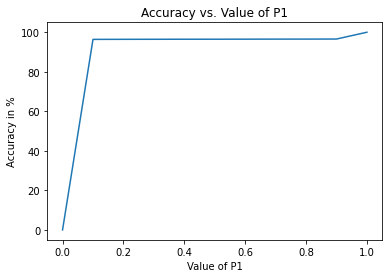

In [120]:
fig, axi = plt.subplots()  
axi.plot(np.arange(0,1.1,0.1), accuracy)  
axi.set_xlabel('Value of P1')  
axi.set_ylabel('Accuracy in %')  
axi.set_title('Accuracy vs. Value of P1')